### 16- Computer Vision - Flower Recognition

In [3]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt




In [4]:
folder_dir = './flowers'

In [5]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [16]:
data_array = np.array(data)

In [17]:
label_array = np.array(label)

In [18]:
encoder = LabelEncoder()

In [19]:
y=encoder.fit_transform(label_array)

In [20]:
y=to_categorical(y,5)

In [21]:
x=data_array/255

In [22]:
len(x)

4317

In [23]:
len(y)

4317

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=10
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.4573 - loss: 1.2825 - val_accuracy: 0.5162 - val_loss: 1.1597
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.5013 - loss: 1.2010 - val_accuracy: 0.5660 - val_loss: 1.1027
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.5199 - loss: 1.1678 - val_accuracy: 0.5521 - val_loss: 1.1315
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.5193 - loss: 1.1483 - val_accuracy: 0.5822 - val_loss: 1.0518
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.5643 - loss: 1.1084 - val_accuracy: 0.5197 - val_loss: 1.2549
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.5512 - loss: 1.0814 - val_accuracy: 0.6134 - val_loss: 0.9820
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.5888 - loss: 1.0581 - val_accuracy: 0.6053 - val_loss: 1.0342
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.5820 - loss: 1.0344 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


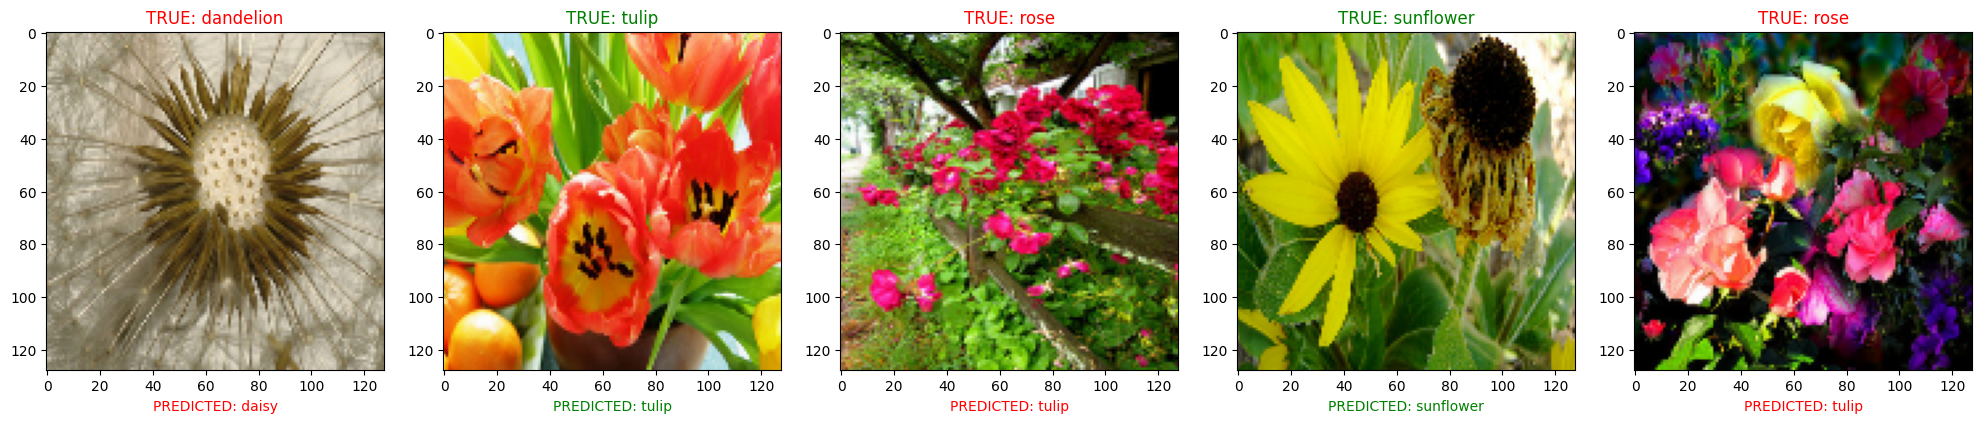

In [36]:
categories = np.sort(os.listdir(folder_dir))

# Create a 1x5 grid of subplots
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

# List to keep track of indices we've already used
used_indices = []

# Loop through each subplot
for idx in range(5):
    # Randomly choose an index from x_test that hasn't been used before
    while True:
        k = np.random.randint(len(x_test))
        if k not in used_indices:
            used_indices.append(k)
            break
        
    # Get the true and predicted labels
    true_label = categories[np.argmax(y_test[k])]
    predicted_label = categories[np.argmax(model.predict(np.array([x_test[k]])))]

    # Determine the color based on whether true and predicted labels match
    title_color = 'green' if true_label == predicted_label else 'red'
    xlabel_color = 'green' if true_label == predicted_label else 'red'

    # Set subplot title and xlabel with colors
    ax[idx].set_title(f"TRUE: {true_label}", color=title_color)
    ax[idx].set_xlabel(f"PREDICTED: {predicted_label}", color=xlabel_color)

    # Display the image in the subplot
    ax[idx].imshow(x_test[k].reshape(SIZE, SIZE, 3), cmap='gray')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [37]:
#save the model
model.save('flower_recognition.h5')